# Linear Regression using Scikit learn

In the notebook where we used numpy.polyfit() on 'Advertising.csv', we find relationship between total_spend and sales.

But here we find the relationship between sales with each of the advertising channels

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Advertising.csv')

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Check relationships

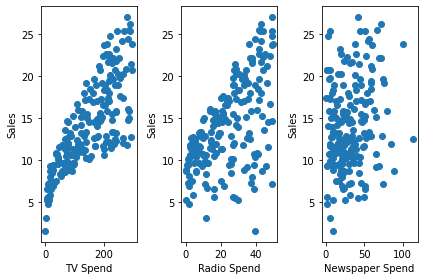

In [5]:
fig, axes = plt.subplots(1, 3)

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].set_ylabel('Sales')
axes[0].set_xlabel('TV Spend')

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].set_ylabel('Sales')
axes[1].set_xlabel('Radio Spend')

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].set_ylabel('Sales')
axes[2].set_xlabel('Newspaper Spend')

plt.tight_layout()

## Split the data into features and label

In [6]:
X = df.drop('sales', axis=1)
y = df['sales']

## Train-test split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [8]:
len(df)

200

In [9]:
len(X_train)

160

## Import the Model

This model can perform Gradient Descent for us, that is why we have included multiple features in the design matrix X. Uses Residual sum of squares to do that.

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtr

In [12]:
model = LinearRegression()

## Train

In [13]:
model.fit(X_train, y_train)

LinearRegression()

# Performance Evaluation (Regression Metrics)

## Common Metrics for Regression:

- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)

## Mean Absolute Error

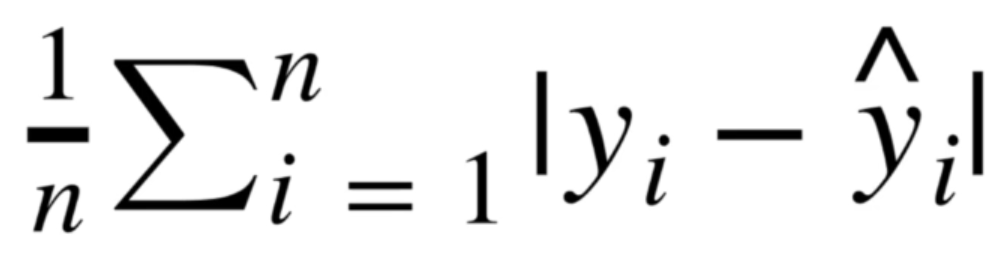

Problem with this:
- Doesnt punish large errors
- Fix: Take into account the large errors => Use MSE

## Mean Squared Error

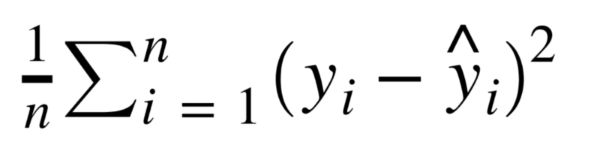

- Punishes large errors

Problem:
- Reports the error in different units (y squared units)
- Fix: RMSE

## Root Mean Squared Error

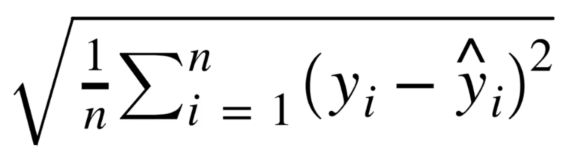

Fixes the unit

## Predict

In [14]:
# Gives our predictions: y cap
test_predictions = model.predict(X_test)

Using performance metrics to evaluate the predictions

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

<AxesSubplot:xlabel='sales', ylabel='Count'>

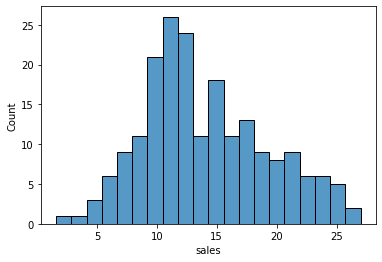

In [16]:
sns.histplot(data=df, x='sales', bins=20)

Using MAE

In [17]:
mean_absolute_error(y_test, test_predictions)

1.1244750006255653

Using MSE, RMSE

In [18]:
# MSE
mse = mean_squared_error(y_test, test_predictions)
mse

2.063418850121476

In [19]:
# RMSE
np.sqrt(mse)

1.43646052856369

# Evaluating Residuals

## Why? 

To decide whether Linear Regression was a good choice for this particular problem or not

### The residuals must be random and close to normal distribution

If the residual plot shows some pattern, curve or line, then in that case Linear Regression is invalid

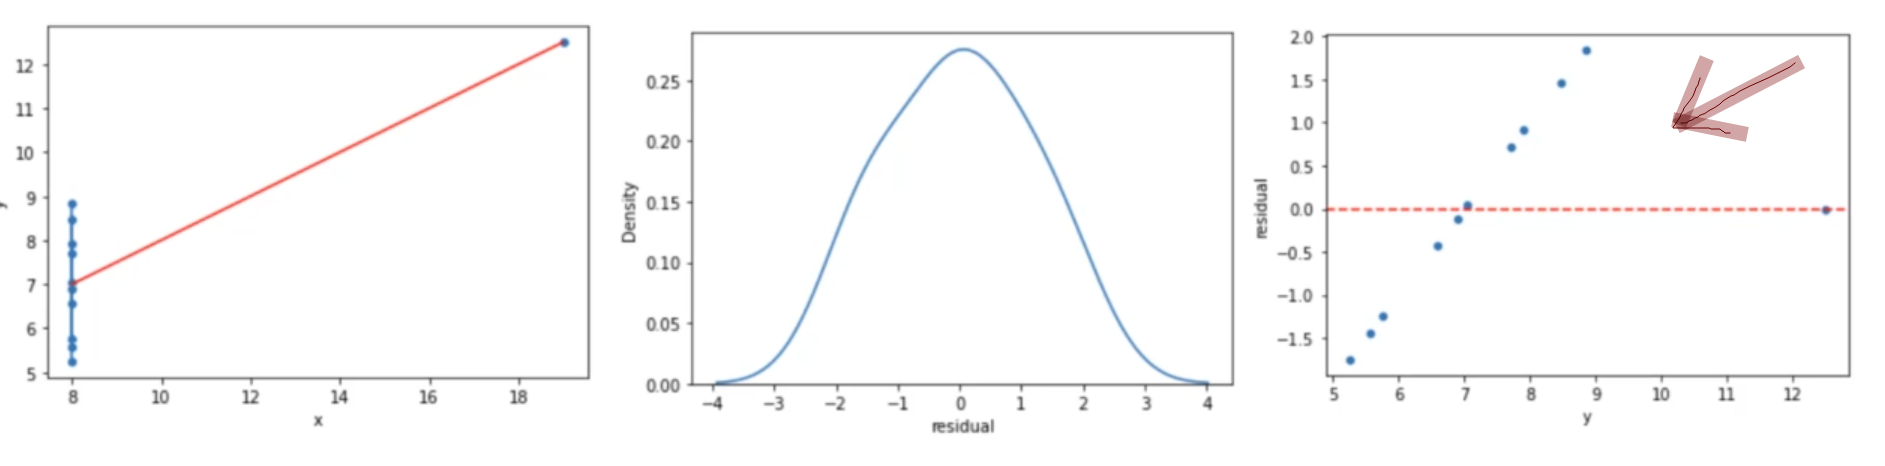

1. Line fit plot (Deceptive)
2. Distribution plot of residuals (Doesnt tell much)
3. Residual plot (Best indicator)

In [20]:
test_residuals = y_test - test_predictions

### Residual plot

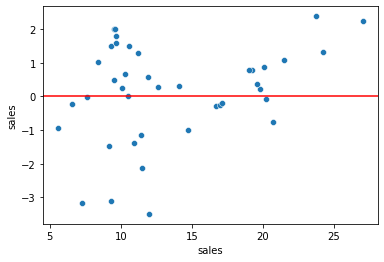

In [21]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red', ls='-')

### Distribution of the residuals

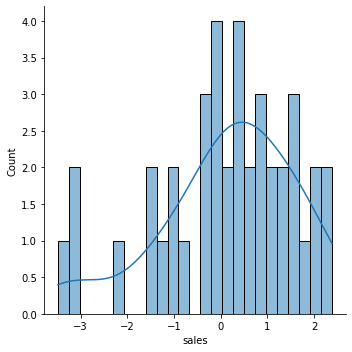

In [22]:
# MOstly normally distributed
sns.displot(test_residuals, bins=25, kde=True)

## Final Model and Deployment

We fit the model on all data

In [23]:
final_model = LinearRegression()

In [24]:
final_model.fit(X, y)

LinearRegression()

## These coeff are relationships between each of the features and the label

In [25]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

From the above coefficients, we can infer that spending on newspaper is not boosting sales.

Also, all the features had the same units, so we could compare the coefficients with each other, if they were different, we couldn't have

## Persisting and Saving the model

In [27]:
from joblib import dump, load

In [28]:
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

Now we have a trained model.

To load it back up

In [30]:
loaded_model = load('final_sales_model.joblib')

In [31]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

It will have the same coefficients